<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/simpleNN_batchnormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 2nd June, 2023
# Ref: https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/tutorial
# Data Source: concrete dataset

## Process data

In [ ]:
# 1.0
%reset -f
import pandas as pd
from pathlib import Path

# 1.0.1
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

# 1.0.2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [ ]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 1.2

from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# 1.2.1

pathToFolder = "/gdrive/MyDrive/Colab_data_files/deeplearning"

In [ ]:
# 1.2.2

path = Path(pathToFolder) / "concrete.csv"

In [ ]:
# 2.0 Read data
concrete = pd.read_csv(path)
df = concrete.copy()

In [ ]:
# 2.1 Split data:

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

In [ ]:
# 2.2 Split further into target/predictors:

X_train = df_train.drop('CompressiveStrength', axis=1)
X_valid = df_valid.drop('CompressiveStrength', axis=1)
y_train = df_train['CompressiveStrength']
y_valid = df_valid['CompressiveStrength']

In [ ]:
# 2.3 Data shape for NN:

input_shape = [X_train.shape[1]]

## Model without Batch Normalization

In [ ]:
# 3.0
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

Minimum Validation Loss: nan


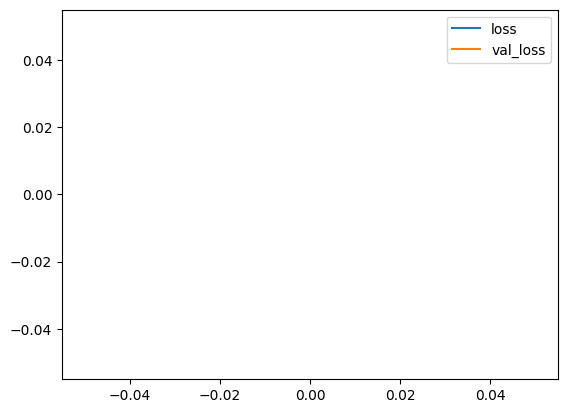

In [ ]:
# 3.1 Compile the model:

model.compile(
    optimizer='sgd', # SGD is more sensitive to differences of scale
                     # That is if columns have difft scales sgd may 
                     # not give correct results. USe StandardScaler() or
                     # Batch Normalization
    loss='mae',
    metrics=['mae']

)



In [ ]:
# 3.2 Train and plot model:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=200,
    verbose=0,
)



In [ ]:
# 3.3 
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

Did you end up with a blank graph? Trying to train this network on this dataset will usually fail. Even when it does converge (due to a lucky weight initialization), it tends to converge to a very large number.

## Batch Normalization

Add four BatchNormalization layers, one before each of the dense layers. (Remember to move the input_shape argument to the new first layer.)

In [ ]:
# 4.0 Model with batch normalization:

model = keras.Sequential([
    layers.BatchNormalization(input_shape = input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1),
])

Minimum Validation Loss: 3.5905


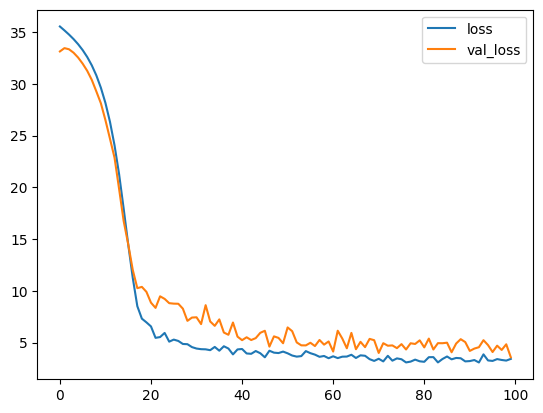

In [ ]:
# 4.1 Compile, train and plot results:

model.compile(
    optimizer='sgd',
    loss='mae',
    metrics=['mae']
)

# 4.2
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=100,
    verbose=0,
)

# 4.3
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

In [ ]:
### ----------- Done -------------